### Decision Tree Classification Algorithm

- supervised ML technique
- able to do both classification and regression
- able to handle both numerical and categorical data
- We start with a question, and hence splits the dataset into branches, keep going dividing the dataset on various criterion

It is a tree-structured classifier,
where 
- internal nodes represent the features of a dataset, 
- branches represent the decision rules and 
- each leaf node represents the outcome.

- In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node,
- parent node and child node are also there.
- Decision nodes are used to make decision, contains multiple brances,
  where as leaf node are the outputs, do not contain further brances

#### Why is it called Decision Tree?

Because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
    
A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.

##### Calculation of Gini Index:

Decision trees recursively split features with regard to their target variable’s purity.
In a general sense “purity” can be thought of as how homogenized a group is.

But this meaning of purity can vary depending  Which kind of concept or criterion is being used.
    
Consider these cases:

- If we have 4 red balls and 0 blue balls, that group of 4 is 100% pure.
- If we have 2 red and 2 blue ball, that group is 100% impure.
- If we have 3 red and 1 blue, that group is either 75% or 81% pure, if we use Gini or Entropy respectively.

Depending on which impurity measurement is used, tree classification results can vary

    Gini = Summ(1 to N(Pi**2))

If we arbitrarily have all 4 balls as red, how often would one of the balls be incorrectly labeled??

In [21]:
#  4 red and 0 blue:

    Gini Index= 1-(P(red)**2 + P(blue)**2) = 1 - (1^2 - 0^2) = 0
If we arbitrarily chose to all the balls ‘blue’, then our index would still be 0, because we would always incorrectly label the balls.

The gini score is always the same no matter what arbitrary class you take the probabilities of because they always add to 0 in the formula above.

A gini score of 0 is the most pure score possible.

In [19]:
# 2 red and 2 blue:

<img src='gi2.jpg'>
                    
                   Image Source:towardsdatascience.com

The impurity measurement is 0.5 because we would incorrectly label gumballs wrong about half the time.

Because this index is used in binary target variables (0,1), a gini index of 0.5 is the least pure score possible.

In [22]:
# 3 red and 1 blue:

<img src='gi3.jpg'>
                    
                   Image Source:towardsdatascience.com

##### Calculation of Entropy:

- Instead of utilizing simple probabilities, this method takes the log base2 of the probabilities.
- computationally heavy due to the log in the equation

As we know the formula for entropy is :
<img src='entropy.jpg'>

In [23]:
# 4 red and 0 blue:

     Entropy= [(P_red * log2(P_red)] - [(P_blue * log2(P_blue)]
    =[(4/4) * log2(4/4)] - [(0/4) * log2(0/4)] = 0
Zero is the mosrt purity score.

In [24]:
# 2 red and 2 blue:

     Entropy= [(P_red * log2(P_red)] - [(P_blue * log2(P_blue)]
    =[(2/4) * log2(2/4)] - [(2/4) * log2(2/4)] = 1
Impurity measurement is 1 here, as it’s the maximum impurity obtainable

In [25]:
# 3 red and 1 blue:

     Entropy= [(P_red * log2(P_red)] - [(P_blue * log2(P_blue)]
    =[(3/4) * log2(3/4)] - [(1/4) * log2(1/4)] = 0.811
The purity/impurity measurement is 0.811 here, a bit worse than the gini score.

#### Visualization of Gini and Impurity

In [27]:
#Gini Function
#a and b are the quantities of each class
def gini(a,b):
    a1 = (a/(a+b))**2
    b1 = (b/(a+b))**2
    return 1 - (a1 + b1)

let’s make a loop that calculates the gini score of any combination of red and blue ball floats, adding to 4. We will run 10,000 iterations of the gini function above so we can graph the gini curve later.

In [30]:
import numpy as np
import random
import pandas as pd

In [32]:
#Blank lists
gini_list = []
blue_list = []
red_list = []
blue_prob_list = []

#Looping Gini function on random blue and red float amounts
for x in range (10000):
 blue = random.uniform(0, 4)
 red = abs(4-blue)
 a = gini(red,blue)
 b = blue/(blue+red)
 gini_list.append(a)
 blue_list.append(blue)
 red_list.append(red)
 blue_prob_list.append(b)
    
#Dataframe of amount of blue, red, Probability of blue, and gini score
df = pd.DataFrame({'Blue': blue_list, 'Red': red_list,'Gini Score': gini_list, 
                   'Probability of Blue': blue_prob_list})
df = df[['Red', 'Blue', 'Probability of Blue', 'Gini Score']]
df.head(10) 

,Red,Blue,Probability of Blue,Gini Score
0,1.205162,2.794838,0.698709,0.421029
1,2.549465,1.450535,0.362634,0.462261
2,0.078243,3.921757,0.980439,0.038356
3,3.493260,0.506740,0.126685,0.221272
4,3.084422,0.915578,0.228895,0.353004
5,2.236469,1.763531,0.440883,0.493010
6,0.318664,3.681336,0.920334,0.146639
7,0.614036,3.385964,0.846491,0.259888
8,0.587232,3.412768,0.853192,0.250511
9,0.949674,3.050326,0.762581,0.362102


In [33]:
# plotting the curve

Text(0.5, 1.0, 'Gini Curve')

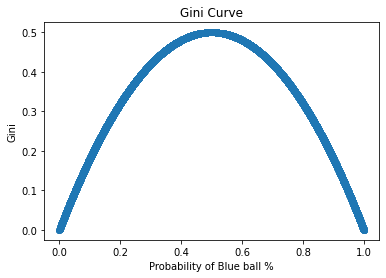

In [34]:
plt.scatter(blue_prob_list,gini_list)
plt.xlabel('Probability of Blue ball %')
plt.ylabel('Gini')
plt.title('Gini Curve')

In [37]:
# Entropy
import math
from math import log

In [39]:
#a and b are the quantities of each class. Base is the log base input.
def entropy(base,a,b):
    try:
        var =  abs(((a)/(a+b)) * log(((a)/(a+b)),base)) - (((b)/(a+b)) * log(((b)/(a+b)),base))
        return var
    except (ValueError):
        return 0
#Blank lists
ent_list = []
blue_list = []
red_list = []
blue_prob_list = []
#Loop with log base 2
for x in range (10000):
    blue = random.uniform(0, 4)
    red = abs(4-blue)
    a = entropy(2,red,blue)
    b = blue/(blue+red)
    ent_list.append(a)
    blue_list.append(blue)
    red_list.append(red)
    blue_prob_list.append(b)
df = pd.DataFrame({"Blue": blue_list, "Red": red_list,"Entropy": ent_list, 
                   "Probability of Blue": blue_prob_list})
df = df[['Red', 'Blue', 'Probability of Blue', 'Entropy']]
df.head(10)

,Red,Blue,Probability of Blue,Entropy
0,0.979353,3.020647,0.755162,0.802994
1,1.499406,2.500594,0.625149,0.954324
2,3.367043,0.632957,0.158239,0.630081
3,2.753964,1.246036,0.311509,0.894908
4,2.332944,1.667056,0.416764,0.979916
5,3.605793,0.394207,0.098552,0.464388
6,2.151767,1.848233,0.462058,0.995842
7,2.121612,1.878388,0.469597,0.997331
8,0.757573,3.242427,0.810607,0.700201
9,2.272161,1.727839,0.431960,0.986601


Text(0.5, 1.0, 'Entropy Curve')

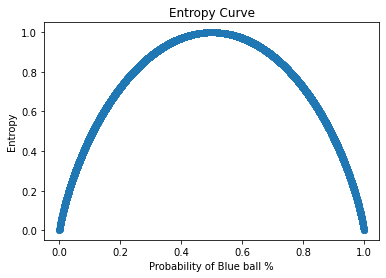

In [40]:
plt.scatter(blue_prob_list,ent_list)
plt.xlabel('Probability of Blue ball %')
plt.ylabel('Entropy')
plt.title('Entropy Curve')

In [41]:
# Comparison

### Terminologies of Decision Tree

Root Node: a node from where the decision tree starts, represents the entire dataset, which further gets divided into two or more homogeneous sets.

Leaf Node: final output node, after which tree cannot be segregated

Splitting: process of dividing the decision node/root node into sub-nodes according to the given conditions.

Branch/Sub Tree: A tree formed by splitting the tree.

Pruning: Pruning is the process of removing the unwanted branches from the tree.

Parent/Child node: The root node of the tree is called the parent node, and other nodes are called the child nodes.

In [1]:
### How does the Decision Tree algorithm Work?

1. Consider the entire data, says S, it is the root node
2. Find the best attribute in the dataset using Attribute Selection Measure (ASM).
3. Divide the dataset 'S' into subsets that contains possible values for the best attributes
4. Generate the decision tree node, which contains the best attribute.
5. Recursively make new decision trees using the subsets of the dataset created in step -3. Continue this process until a stage is reached where you cannot further classify the nodes and called the final node as a leaf node.

In [1]:
# Assumptions we make while using Decision tree :

- At the beginning, we consider the whole training set as the root node
- Attributes are assumed to be categorical for information gain and assumed continuous for gini index.
- On the basis of attribute values records are distributed recursively
- We use statistical methods for ordering attributes as root or internal node

In [2]:
# Pseudocode for Decision Tree:
# Pseudocode is a theoretical written structure of the code, its like a outline of the code.

1. Find the best attribute and make it the root node of the tree.
2. Now, split the training set into subsets. While making the subset make sure that each subset of training dataset should have the same value for an attribute.
3. Find leaf nodes in all branches by repeating 1 and 2 on each subset.

#### Attribute Selection Measures

In Decision Tree the major challenge is identification of the attribute for the root node in each level. 
We can use various kind of techniques to choose best attribute, this process is called ASM

- ASM is a technique to select the best attribute for the root node and for sub-nodes.
- If the decision tree build is appropriately then the depth of the tree will be less or else depth will be more.


There are two popular techniques for ASM
1. Information Gain
2. Gini Index

In [17]:
# Information Gain:  Using Entropy:

- Change in entropy after the segmentation of a dataset based on an attribute.
- model always tries to maximize IG, and a node/attribute having the highest IG is split first.
- Information gain is non-negative.
- Information Gain is symmetric such that switching of the split variable and target variable, the same amount of information gain is obtained. (Source)
- if the value of information gain increases after splittig, than that feature is most useful for classification.
- feature having the highest value of information gain is chosen first for the split.

Information Gain= Entropy(S)- [(Weighted Avg) *Entropy(each feature)  

In [1]:
# ENTROPY

- Degree of uncertainty, impurity or disorder in a dataset
- OR, simply its a measure of randomness in a data
- Here, if all elements belong to a single class, then it is termed as “Pure”, and if not then the distribution is named as “Impurity”.
- It is computed between 0 and 1, however, heavily relying on the number of groups or classes present in the data set it can be more than 1 while depicting the same significance i.e. extreme level of disorder.
- If a dataset contains homogeneous subsets of observations, then no impurity or randomness is in the dataset. 
- And, if all the observations belong to one class, the entropy of that dataset/feature column becomes zero.

<img src='entropy.jpg'>

Gain Ratio = Information Gain/Entropy

In [18]:
#### Gini Index:

- measure of impurity or purity used while creating a decision tree
- its a metric to measure how often a randomly chosen element would be incorrectly identified.
- So, an attribute with the low Gini index should be preferred
- works on categorical variables, provides outcomes either be “successful” or “failure” and hence conducts binary splitting only
- creates binary splits, and the CART algorithm uses the Gini index to create binary splits

The degree of gini index varies from 0 to 1

- Where 0 depicts that all the observations belong to a certain class, or only one class exists there. 
- gini index of value as 1 signifies that all the datapoints are randomly zdistributed across various classes, and
 
A value of 0.5 denotes the elements are uniformly distributed into some classes. 

<img src='Gini-index.jpg' height=100, width=250>

#### Pruning: Getting an Optimal Decision tree

- Pruning is a process of deleting the unnecessary nodes from a tree in order to get the optimal decision tree
- A too-large tree increases the risk of overfitting, and a small tree may not capture all the important features of the dataset
- So,a technique that decreases the size of the learning tree without reducing accuracy is known as Pruning

There are mainly two types of tree pruning technology used:
1. Cost Complexity Pruning
2. Reduced Error Pruning.

In [3]:
### Advantages of the Decision Tree

- follows the same process which a human follow while making any decision in real-life.
- very useful for solving decision-related problems
- think about all the possible outcomes for a problem
- less requirement of data cleaning compared to other algorithms

In [4]:
### Disadvantages of the Decision Tree

- contains lots of layers, which makes it complex
- For more class labels, the computational complexity of the decision tree may increase
- less appropriate for prediction of continuous target
- if relatively small number of training examples is provided then it is prone to errors in classification with many classes

#### Python Implementation of Decision Tree

In [4]:
from sklearn.tree import DecisionTreeClassifier  
model= DecisionTreeClassifier(criterion='entropy', random_state=0)  

criterion='entropy': Criterion is used to measure the quality of split, which is calculated by information gain given by entropy.

Entropy tells the randomness in a data, more entropy means more information gain

    DecisionTreeClassifier(
        criterion='gini',
        splitter='best',
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        max_features=None,
        random_state=None,
        max_leaf_nodes=None,
        min_impurity_decrease=0.0,
        min_impurity_split=None,
        class_weight=None,
        ccp_alpha=0.0)
        
**Parameters**

    criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.

    splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported strategies are "best" to choose the best split and "random" to choose the best random split.

    max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

    min_samples_split : int or float, default=2
    The minimum number of samples required to split an internal node:

    - If int, then consider `min_samples_split` as the minimum number.
    - If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split.


    min_samples_leaf : int or float, default=1
    The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least ``min_samples_leaf`` training samples in each of the left and right branches. This may have the effect of smoothing the model,especially in regression.

    - If int, then consider `min_samples_leaf` as the minimum number.
    - If float, then `min_samples_leaf` is a fraction and
      `ceil(min_samples_leaf * n_samples)` are the minimum
      number of samples for each node.

    .. versionchanged:: 0.18
       Added float values for fractions.

min_weight_fraction_leaf : float, default=0.0
    The minimum weighted fraction of the sum total of weights (of all
    the input samples) required to be at a leaf node. Samples have
    equal weight when sample_weight is not provided.

max_features : int, float or {"auto", "sqrt", "log2"}, default=None
    The number of features to consider when looking for the best split:

        - If int, then consider `max_features` features at each split.
        - If float, then `max_features` is a fraction and
          `int(max_features * n_features)` features are considered at each
          split.
        - If "auto", then `max_features=sqrt(n_features)`.
        - If "sqrt", then `max_features=sqrt(n_features)`.
        - If "log2", then `max_features=log2(n_features)`.
        - If None, then `max_features=n_features`.

    Note: the search for a split does not stop until at least one
    valid partition of the node samples is found, even if it requires to
    effectively inspect more than ``max_features`` features.

random_state : int, RandomState instance or None, default=None
    Controls the randomness of the estimator. The features are always
    randomly permuted at each split, even if ``splitter`` is set to
    ``"best"``. When ``max_features < n_features``, the algorithm will
    select ``max_features`` at random at each split before finding the best
    split among them. But the best found split may vary across different
    runs, even if ``max_features=n_features``. That is the case, if the
    improvement of the criterion is identical for several splits and one
    split has to be selected at random. To obtain a deterministic behaviour
    during fitting, ``random_state`` has to be fixed to an integer.
    See :term:`Glossary <random_state>` for details.

max_leaf_nodes : int, default=None
    Grow a tree with ``max_leaf_nodes`` in best-first fashion.
    Best nodes are defined as relative reduction in impurity.
    If None then unlimited number of leaf nodes.

min_impurity_decrease : float, default=0.0
    A node will be split if this split induces a decrease of the impurity
    greater than or equal to this value.

    The weighted impurity decrease equation is the following::

        N_t / N * (impurity - N_t_R / N_t * right_impurity
                            - N_t_L / N_t * left_impurity)

    where ``N`` is the total number of samples, ``N_t`` is the number of
    samples at the current node, ``N_t_L`` is the number of samples in the
    left child, and ``N_t_R`` is the number of samples in the right child.

    ``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,
    if ``sample_weight`` is passed.

    .. versionadded:: 0.19

min_impurity_split : float, default=0
    Threshold for early stopping in tree growth. A node will split
    if its impurity is above the threshold, otherwise it is a leaf.

    .. deprecated:: 0.19
       ``min_impurity_split`` has been deprecated in favor of
       ``min_impurity_decrease`` in 0.19. The default value of
       ``min_impurity_split`` has changed from 1e-7 to 0 in 0.23 and it
       will be removed in 1.0 (renaming of 0.25).
       Use ``min_impurity_decrease`` instead.

class_weight : dict, list of dict or "balanced", default=None
    Weights associated with classes in the form ``{class_label: weight}``.
    If None, all classes are supposed to have weight one. For
    multi-output problems, a list of dicts can be provided in the same
    order as the columns of y.

    Note that for multioutput (including multilabel) weights should be
    defined for each class of every column in its own dict. For example,
    for four-class multilabel classification weights should be
    [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}] instead of
    [{1:1}, {2:5}, {3:1}, {4:1}].

    The "balanced" mode uses the values of y to automatically adjust
    weights inversely proportional to class frequencies in the input data
    as ``n_samples / (n_classes * np.bincount(y))``

    For multi-output, the weights of each column of y will be multiplied.

    Note that these weights will be multiplied with sample_weight (passed
    through the fit method) if sample_weight is specified.

ccp_alpha : non-negative float, default=0.0
    Complexity parameter used for Minimal Cost-Complexity Pruning. The
    subtree with the largest cost complexity that is smaller than
    ``ccp_alpha`` will be chosen. By default, no pruning is performed. See
    :ref:`minimal_cost_complexity_pruning` for details.

    .. versionadded:: 0.22

Attributes
----------
classes_ : ndarray of shape (n_classes,) or list of ndarray
    The classes labels (single output problem),
    or a list of arrays of class labels (multi-output problem).

feature_importances_ : ndarray of shape (n_features,)
    The impurity-based feature importances.
    The higher, the more important the feature.
    The importance of a feature is computed as the (normalized)
    total reduction of the criterion brought by that feature.  It is also
    known as the Gini importance [4]_.

    Warning: impurity-based feature importances can be misleading for
    high cardinality features (many unique values). See
    :func:`sklearn.inspection.permutation_importance` as an alternative.

max_features_ : int
    The inferred value of max_features.

n_classes_ : int or list of int
    The number of classes (for single output problems),
    or a list containing the number of classes for each
    output (for multi-output problems).

n_features_ : int
    The number of features when ``fit`` is performed.

n_outputs_ : int
    The number of outputs when ``fit`` is performed.

tree_ : Tree instance
    The underlying Tree object. Please refer to
    ``help(sklearn.tree._tree.Tree)`` for attributes of Tree object and
    :ref:`sphx_glr_auto_examples_tree_plot_unveil_tree_structure.py`
    for basic usage of these attributes.


Notes
-----
The default values for the parameters controlling the size of the trees
(e.g. ``max_depth``, ``min_samples_leaf``, etc.) lead to fully grown and
unpruned trees which can potentially be very large on some data sets. To
reduce memory consumption, the complexity and size of the trees should be
controlled by setting those parameter values.

The :meth:`predict` method operates using the :func:`numpy.argmax`
function on the outputs of :meth:`predict_proba`. This means that in
case the highest predicted probabilities are tied, the classifier will
predict the tied class with the lowest index in :term:`classes_`.


Examples
--------
>>> from sklearn.datasets import load_iris
>>> from sklearn.model_selection import cross_val_score
>>> from sklearn.tree import DecisionTreeClassifier
>>> clf = DecisionTreeClassifier(random_state=0)
>>> iris = load_iris()
>>> cross_val_score(clf, iris.data, iris.target, cv=10)
...                             # doctest: +SKIP
...
array([ 1.     ,  0.93...,  0.86...,  0.93...,  0.93...,
        0.93...,  0.93...,  1.     ,  0.93...,  1.      ])

In [3]:
# Implementaion of Decision Tree

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

sns.get_dataset_names()

In [6]:
df=sns.load_dataset('iris')
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


    df.mean()
    df.max()
    df.notnull().sum()

    sns.heatmap(df.corr(),annot=True)
    plt.show()

    sns.histplot(df['petal_length'],kde=True)
    sns.histplot(df['petal_width'],kde=True)

    plt.subplot(211)
    sns.boxplot(df['petal_width'])
    plt.show()
    plt.subplot(212)
    sns.boxplot(df['petal_length'])
    plt.show()

from sklearn.model_selection import train_test_split
xtrain,ytrain,xtest,ytest=train_test_split(x,y,test_size=0.20,random_state=1)